In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [52]:
file_path = r'C:\Users\Sama Elshazly\OneDrive\Documents\health_sites_sdn.csv'
# Attempt with a common encoding like Latin-1
df = pd.read_csv(file_path, encoding='latin1')

##### Will explore our data

In [53]:
df.head()

,Name,X,Y,addr_city,addr_street,amenity,changeset_id,changeset_timestamp,changeset_user,changeset_version,completeness,dispensing,osm_id,osm_type,uuid,Unnamed: 15
0,0,32.536015,15.632537,0,0,pharmacy,59859075,2018-06-14 20:48:56,allasafieldin,1,12,yes,5691668660,node,62a1f69b5e464b3a831724e7e633b9f7,NaN
1,0,0.000000,0.000000,0,0,hospital,82920351,2020-04-01 11:29:56,AARod,1,9,0,786505555,way,6bed7ba76fdc43f2a959908df295b6c8,NaN
2,0,32.533961,15.528663,0,0,pharmacy,30685807,2015-05-01 09:28:35,AhmedSDN,1,6,0,3490668393,node,516a03ec3daf43e68f01ca8c8564d169,NaN
3,Wad Musa Pharmacy,32.441141,15.683439,0,0,pharmacy,89779217,2020-08-22 12:03:41,ImadJ,1,15,yes,7834704444,node,77c5b490089945198e0cfa5b45bd5c6b,NaN
4,0,0.000000,0.000000,0,0,hospital,61428897,2018-08-07 09:45:25,ali-hasboo,1,12,0,614753021,way,5888223145234835bd0211b5475c0469,NaN


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 1180 non-null   object 
 1   X                    1180 non-null   float64
 2   Y                    1180 non-null   float64
 3   addr_city            1180 non-null   object 
 4   addr_street          1180 non-null   object 
 5   amenity              1180 non-null   object 
 6   changeset_id         1180 non-null   int64  
 7   changeset_timestamp  1180 non-null   object 
 8   changeset_user       1180 non-null   object 
 9   changeset_version    1180 non-null   int64  
 10  completeness         1180 non-null   int64  
 11  dispensing           1180 non-null   object 
 12  osm_id               1180 non-null   int64  
 13  osm_type             1180 non-null   object 
 14  uuid                 1180 non-null   object 
 15  Unnamed: 15          0 non-null      f

In [55]:
df.describe()

,X,Y,changeset_id,changeset_version,completeness,osm_id,Unnamed: 15
count,1180.000000,1180.000000,1.180000e+03,1180.000000,1180.000000,1.180000e+03,0.0
mean,31.775855,15.186397,9.132590e+06,0.180508,1.436441,6.434055e+09,NaN
std,4.785858,2.337769,2.545192e+07,0.562129,4.111490,1.582652e+09,NaN
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,4.922450e+07,NaN
25%,32.485813,15.534281,0.000000e+00,0.000000,0.000000,6.055029e+09,NaN
50%,32.531007,15.597713,0.000000e+00,0.000000,0.000000,6.953330e+09,NaN
75%,32.570649,15.641503,0.000000e+00,0.000000,0.000000,7.154078e+09,NaN
max,37.217447,20.748716,1.110008e+08,6.000000,24.000000,1.200026e+10,NaN


##### Will delete all dummy column 

In [56]:
df.drop(['addr_city' , 'addr_street' , 'Unnamed: 15' ,'changeset_id','changeset_timestamp',	'changeset_user','changeset_version','completeness','dispensing' , 'uuid'] , axis=1 , inplace=True)

In [57]:
df.head()

,Name,X,Y,amenity,osm_id,osm_type
0,0,32.536015,15.632537,pharmacy,5691668660,node
1,0,0.000000,0.000000,hospital,786505555,way
2,0,32.533961,15.528663,pharmacy,3490668393,node
3,Wad Musa Pharmacy,32.441141,15.683439,pharmacy,7834704444,node
4,0,0.000000,0.000000,hospital,614753021,way


##### Will delete all unknown place 

In [58]:
df = df[df['Name'] != '0']

In [59]:
df

,Name,X,Y,amenity,osm_id,osm_type
3,Wad Musa Pharmacy,32.441141,15.683439,pharmacy,7834704444,node
5,Ombada Model Hospital,32.419073,15.663948,hospital,7966428285,node
6,Tropical Medicine Hospital,32.493623,15.640279,hospital,8006766734,node
8,Al-Hagan Pharmacy,32.444681,15.612955,pharmacy,6801517152,node
10,Eye Hospital,32.545318,15.612304,hospital,7038742276,node
...,...,...,...,...,...,...
1174,Wad Al Bashir Pharmacy,32.460845,15.646339,pharmacy,6068904556,nodes
1175,Spring Wellness Pharmacy,32.621261,15.616220,pharmacy,6824534990,nodes
1176,Abu Arwa Pharmacy,32.611852,15.627639,pharmacy,6824687155,nodes
1177,Dr. Rahmi Pharmacy,32.495008,15.642253,pharmacy,8006760963,nodes


##### Will merge 'node' and 'nodes' to be one category 

In [62]:
df['osm_type'].replace('nodes' , 'node' , inplace=True)

C:\Users\Sama Elshazly\AppData\Local\Temp\ipykernel_21448\1825088087.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['osm_type'].replace('nodes' , 'node' , inplace=True)


In [67]:
count_type = df['osm_type'].value_counts()

Text(0.5, 1.0, 'Way VS node')

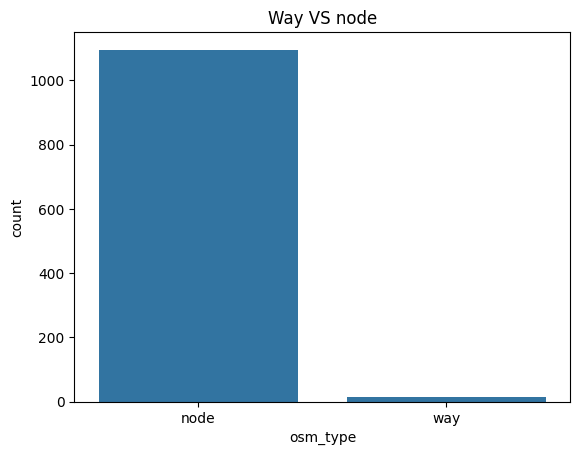

In [71]:
sns.barplot(data = count_type)
plt.title('Way VS node')

<Axes: xlabel='amenity', ylabel='count'>

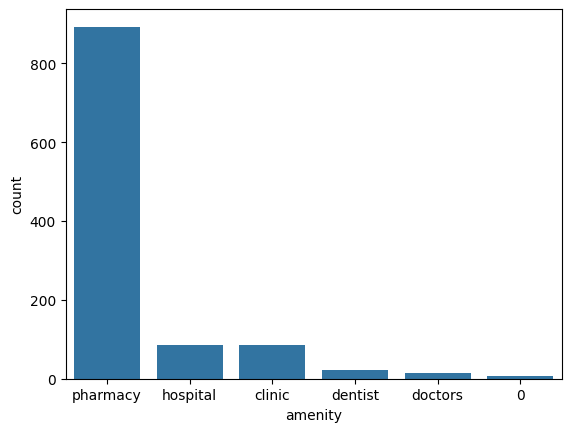

In [73]:
sns.barplot(data = df['amenity'].value_counts())

In [75]:
df[df['amenity']=='0']

,Name,X,Y,amenity,osm_id,osm_type
215,Medani Health Centre,33.500046,14.427580,0,7301850739,node
663,Total Lab Care Laboratories,32.563350,15.566572,0,6875522966,node
664,Safana Center for Physiotherapy and Rehabilita...,32.570552,15.577111,0,7905516322,node
795,Al Jazeera Optics,32.558869,15.546857,0,7904462758,node
952,Diseased tissues Prof. Ali Abdel Sattar,32.533732,15.599289,0,7038742275,node
953,Al Rayyan Specialized Laboratory,32.529401,15.599440,0,7904462759,node
1066,Al-Haramain Pharmacy,32.484762,15.480549,0,8018298465,node
1085,Mattia Optics,32.571616,15.604573,0,7904462757,node


##### Will drop the (0 , 0) point

In [ ]:
df = df[df['X'] != 0]

##### We will replace the unknown amenity with 'Other' word

In [81]:
df['amenity'].replace('0' , 'Other' , inplace=True)

C:\Users\Sama Elshazly\AppData\Local\Temp\ipykernel_21448\809446212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['amenity'].replace('0' , 'Other' , inplace=True)


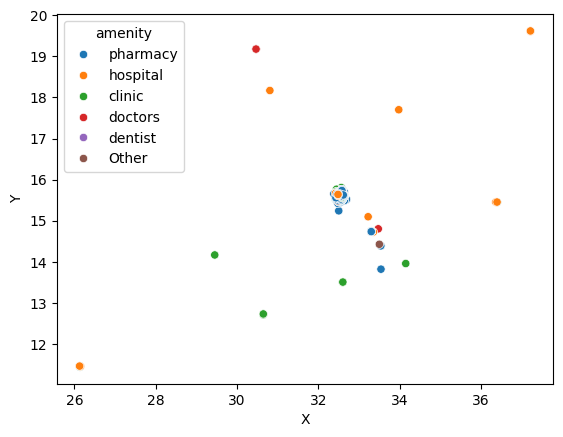

In [82]:
sns.scatterplot(x=df['X'], y=df['Y'], hue=df['amenity'])
plt.show()

C:\Users\Sama Elshazly\AppData\Local\Temp\ipykernel_21448\859275977.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
C:\Users\Sama Elshazly\AppData\Local\Temp\ipykernel_21448\859275977.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
C:\Users\Sama Elshazly\AppData\Local\Temp\ipykernel_21448\859275977.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
C:\Users\Sama Elshazly\AppData\Local\Temp\ipykernel_21448\859275977.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
C:\Users\Sama Elshaz

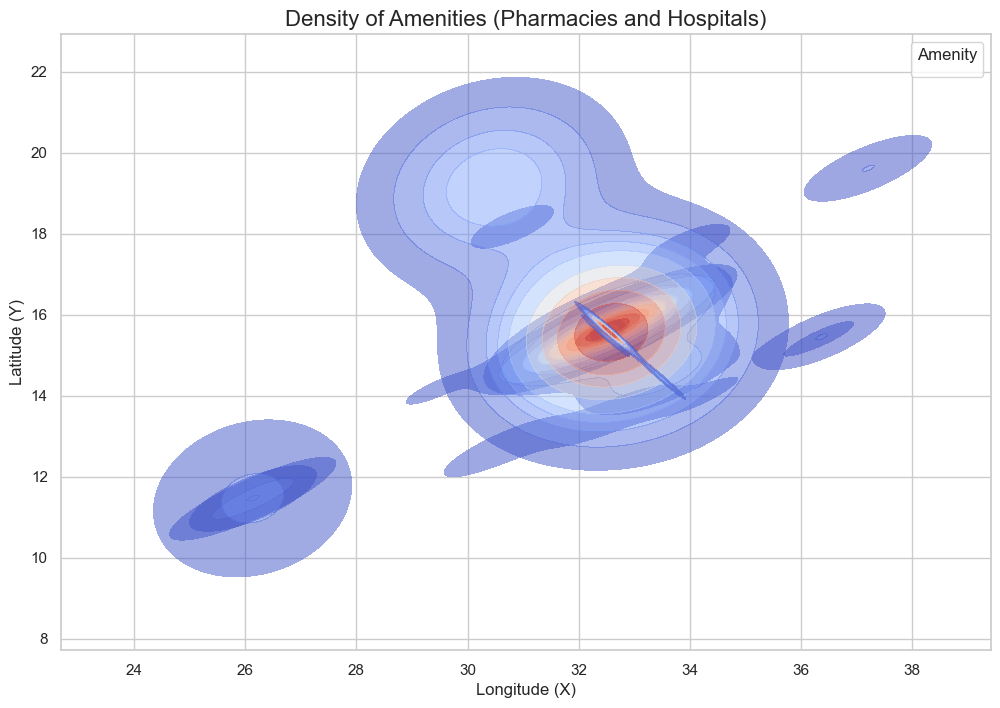

In [90]:
plt.figure(figsize=(12, 8))

# Plot density for each amenity
for amenity in df['amenity'].unique():
    sns.kdeplot(
        x=df[df['amenity'] == amenity]['X'], 
        y=df[df['amenity'] == amenity]['Y'], 
        cmap="coolwarm",
        shade=True, 
        alpha=0.5, 
        label=amenity
    )

plt.title("Density of Amenities", fontsize=16)
plt.xlabel("Longitude (X)", fontsize=12)
plt.ylabel("Latitude (Y)", fontsize=12)
plt.legend(title="Amenity")
plt.show()
